# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 30 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 35 баллов

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 5 &mdash; 35 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 6 &mdash; 35 баллов



-----

In [ ]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma, loggamma

sns.set_style("whitegrid")

%matplotlib inline

## <b>Теоретическая часть</b>
### <b><font color="blue">Легкая часть</font></b>

## Задача 1
Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения:

1. Для $\mathcal{N}(a,\sigma^2)$ найдите ОМП в следующих случаях:
    <br>a. $\theta = (a, \sigma^2)$
    <br>b. $\theta = \sigma^2$, $a$ известно
    <br>c. $\theta = a$, $\sigma^2$ известно (для этого случая посчитайте также асимптотическую дисперсию оценки по теореме из лекции)
     

2. $\mathrm{Pois}(\theta)$. Посчитайте асимптотическую дисперсию, если оценка является асимптотически нормальной по теореме из лекции.

        

**Пункт 1**

Функция правдоподобия: 
$$
\mathcal{L}(\theta, \sigma^2) = \left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\exp \left(\frac{\sum\limits_{i=1}^n(x_i-a)^2}{2\sigma^2}\right)
$$
Зная по отдельности один из двух оцениваемых параметров, можно получть ОМП посчитав $\frac{\partial\mathcal{L}}{\partial\theta}$ и $\frac{\partial\mathcal{L}}{\partial\sigma^2}$ и приравняв их к нулю. Но поскольку логарифм дифференцировать удобнее, можно вначале получить $\ell(\theta, \sigma^2)$:
$$
\ell(\theta, \sigma^2)= -\frac n2\ln 2\pi -\frac n2 \ln \sigma^2 -\frac{1}{2\sigma^2}\sum\limits_{i=1}^n(x_i-a)^2
$$
Откуа уже несложно получить соответствующие оценки:
$$
\widehat{a} = \frac{1}{n}\sum\limits_{i=1}^nx_i
$$
$$
\widehat{\sigma^2} = \frac{1}{n}\sum\limits_{i=1}^n(x_i-a)^2
$$
Или, в случае когда оба параметра нам неизвестны:
$$
\widehat{\sigma^2} = \frac{1}{n}\sum\limits_{i=1}^n\left(x_i - \sum\limits_{i=1}^n x_i \right)^2\ =\ \frac{1}{n}\sum\limits_{i=1}^n(x_i-\widehat{a})^2\ =\ S^2
$$
Таким образом: $\widehat{\theta}(x)=(\overline{x}, S^2)$

В случае, если нам известно значение $\sigma^2$ мы можем посчитать асимптотическую оценку дисперсии. Мы считаем все $x_i$ независимыми в совокупности, после чего воспользуемся свойством дисперсии независимых величин
$$
\mathbb D [\widehat{a}]\ =\ \mathbb D \left[\frac{1}{n}\sum\limits_{i=1}^nx_i \right]\ =\ \frac1{n^2}\cdot n\sigma^2 = \frac{\sigma^2}n
$$

**Пункт 2**

$x_1, ..., x_n\ \sim\ \mathrm{Pois}(\theta)$ Плотность распределения: $p_{\theta}(x) = \frac{\theta^x}{x!}e^{-\theta}$
$$
\mathcal{L}=\prod\limits_{i=1}^n\frac{\theta^{x_i}}{x_i!}e^{-\theta}=\frac{\theta^{\sum\limits_{i=1}^n x_i}}{\prod\limits_{i=1}^n x_i !}e^{-n\theta}
$$
$$
\log(\mathcal{L})\ =\ \ell(\theta) = \ln\theta\cdot\sum\limits_{i=1}^n x_i-\ln\prod\limits_{i=1}^n x_i ! + \ln\theta n\ =\ \ln\theta\cdot\sum\limits_{i=1}^n x_i-\sum\limits_{i=1}^nln x_i ! + \ln\theta n
$$
$\mathcal{L}_{x_1}=x_1\ln\theta-\theta -\ln x_1! $, по теореме из лекции. Тогда:
$$
\frac{\partial \mathcal{L}_{x_1}}{\partial x_1}= \frac{x_1-\theta}{\theta}
$$
$$
\mathbb E \left[\frac{\partial \mathcal{L}_{x_1}}{\partial x_1} \right]^2 = \frac{\mathbb E (x_1-\theta)^2}{\theta^2} = \frac{\mathbb D x_1}{\theta^2} = \frac 1\theta\ \Longrightarrow \widehat{\theta}=\left(\frac 1\theta \right)^{-1} = \theta
$$

## Задача 2
Рассмотрим задачу классификации в случае наличия более двух классов.

Пусть $X_1,...,X_n$ &mdash;  выборка из категориального распределения, то есть $P_\theta(X_1 = j) = \theta_j$ для $j \in \{1, ..., k\}$, причем $\theta = (\theta_1, ..., \theta_k), \theta_j \geqslant 0$ и $\theta_1 + ... + \theta_k = 1$.

1. Получите функцию правдоподобия для данной задачи. Используя результат, выпишите функцию потерь, которую вы бы минимизировали при обучении модели классификации. Проверьте, что в случае $k=2$ результат совпадает с logloss'ом.
2. Найдите оценку максимального правдоподобия параметра $\theta$ и проверьте ее на состоятельность.

**Пункт1**

Для начала по определению запишем функцию правдоподобия  в случае категориального распределения:
$$
\mathcal{L}=\left(\frac{n!}{\prod\limits_{j=1}^kn_j!}\right) \prod\limits_{i=1}^n\theta_{j_i} = \frac{n!}{\prod\limits_{j=1}^kn_j!}\prod\limits_{j=1}^k(\theta_j)^{n_j} = \frac{n!}{\prod\limits_{j=1}^kn_j!}\left(\prod\limits_{j=1}^{k-1}(\theta_j)^{n_j}\right)\cdot (1-\sum\limits_{j=1}^{k-1}\theta_j)^{n_k}
$$
Здесь $n_j$ - количество элементов класса $j$ в нашей выборке
Для k=2 ($n$ -элементов всего, $m-$ элементов одного из классов):
$$
\mathcal{L}= \frac{n!}{m!(n-m)!}\theta^m (1-\theta)^{n-m}
$$
Теперь прологорифмируем выражение и сравнием его с LogLoss:
$$
log(\mathcal{L}(\theta))\ =\ \ell(\theta)\ =\ \text{Const}(n,m)+m \log(\theta) + (n-m) \log(1-\theta)
$$
Да, видно что полученная функция совпадает с ним

**Пункт2**

Теперь найдём ОМП для $\theta$ для k=2:
$$
\frac{\partial\mathcal{L}(\theta)}{\theta} = m\theta^{m-1}(1-\theta)^{n-m} - (n-m)\theta^l(1-\theta)^{n-m-1} = 0 \Rightarrow
m(1-\theta) - (n-m)\theta = 0\Rightarrow m\ =\ n\theta \Rightarrow \widehat{\theta} = \frac mn
$$

Данная оценка является состоятельной по ЗБЧ

### <b><font color="orange">Сложная часть</font></b>

## Задача 3

Рассмотрим модель линейной регрессии

$$Y = X \theta + ɛ,$$

где $Y \in \mathbb{R}^n$ - отклик, $X \in \mathbb{R}^{n \times d}$, $\theta \in \mathbb{R}^d$, $ɛ \in \mathbb{R}^n$ - шум, $n > d$, $rk X = d$.

Будем рассматривать нормальный и гомоскедастичный шум, т.е. $ɛ \sim \mathcal{N}(0, 1)$

1. Получите выражение для функции правдоподобия в данной модели. Минимизации какой функции потерь эквивалента максимизация правдоподобия в данной задаче?
2. Найдите оценку максимального правдоподобия для $(\theta, \sigma^2)$.

3. Пусть $x_{new} \in \mathbb{R}^{d}$ - новый объект. Постройте асимптотический доверительный интервал для ожидаемого значения отклика на этом объекте $y_{new} = x_{new}^T \theta$.
    <br>*Указание:* используя модель регрессии, получите распределение, которое имеет величина $\widehat{\theta}_{\text{МНК}}$. Учитывая свойства, данные в домашнем задании №1, получите распределение для  $x_{new}^T\widehat{\theta}_{\text{МНК}}$. Считая величину $\sigma^2$ известной, запишите интервал. Далее замените дисперсию $\sigma^2$ на ее состоятельную оценку.

**Пункт 1**

Для начала получим выражение для функции правдоподобия. Для случайного вектора $Y=Y_i$ по определению функции правдоподобия:
$$
\mathcal{L}(\theta, \sigma^2) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left({-\frac 12\left(\frac
{Y_i-\sum\limits_{j=1}^dX_{ij}\theta_j}{\sigma}\right)^2}\right) =\left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)^n\exp\sum\limits_{i=1}^{n}\left({-\frac 12\left(\frac
{Y_i-\sum\limits_{j=1}^dX_{ij}\theta_j}{\sigma}\right)^2}\right)
$$
Теперь можем найти экстремум этой функции по $\theta$:
$$
\frac{\partial\mathcal{L}(\theta, \sigma^2)}{\partial \theta} = \mathcal{L}\cdot \frac{1}{\sigma^4}(Y-X\theta)(Y-X\theta)^T((Y-X\theta)^TX+(Y-X\theta)X^T)=0\Longrightarrow \widehat{\theta} = (X^TX)^{-1}X^TY,
$$
Что соответствует минимизации MSE в методе наименьших квадратов, рассматриваемом ранее

**Пункт 2**

Найдём ОМП для параметра $\sigma^2$:
$$
\left(\frac{\partial\mathcal{L}(\theta, \sigma^2)}{\partial \sigma^2}\right)_{\theta} = -\frac{n\mathcal{L}}{2\sigma^2}+\mathcal{L}\cdot{\frac 12\left(\frac
{\left(Y_i-\sum\limits_{j=1}^dX_{ij}\theta_j\right)^2}{\sigma^2}\right)}\frac 1{\sigma^2}\ =\ 0
$$
Видно, что часть множителей сокращается и можно преобразовать полученное соотношение к виду:
$$
\widehat{\sigma^2}=\frac{\left(Y_i-\sum\limits_{j=1}^dX_{ij}\theta_j\right)^2}{n}=\frac{(Y-X\theta)^T(Y-X\theta)}{n}
$$

**Пункт 3**

Тогда после того как мы получили оценки параметров $\sigma^2$ и $\theta$ мы можем построить АДИ для ожидаемого занчения отклика $y_{new}$ используя результаты, полученные ранее:
$$
\theta \in \left[\widehat{\theta}-\frac{z_{(1+\alpha)/2}}{\sqrt{n}}\sqrt{\widehat{\sigma^2}}\ ;\ \widehat{\theta}+\frac{z_{(1+\alpha)/2}}{\sqrt{n}}\sqrt{\widehat{\sigma^2}}\ \right]
$$

Где $z_{(1+\alpha)/2}$ квантили уровня доверия $\alpha$ для Нормального распределения

## <b>Практическая часть</b>
### <b><font color="blue">Легкая часть</font></b>
## Задача 4
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить:
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.


 Запишите их в виде таблицы.

In [15]:
nums=[4,8,9,11]
data=pd.read_csv('wine.data', header=None)[nums]
names = ["Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"]
dict_names = {nums[j] : names[j] for j in range(len(names))}
data = data.rename(columns=dict_names)
data.describe()

,Alcalinity of ash,Nonflavanoid phenols,Proanthocyanins,Hue
count,178.000000,178.000000,178.000000,178.000000
mean,19.494944,0.361854,1.590899,0.957449
std,3.339564,0.124453,0.572359,0.228572
min,10.600000,0.130000,0.410000,0.480000
25%,17.200000,0.270000,1.250000,0.782500
50%,19.500000,0.340000,1.555000,0.965000
75%,21.500000,0.437500,1.950000,1.120000
max,30.000000,0.660000,3.580000,1.710000


Далее выведем значения доверительных интервалов для разных признаков в виде таблицы.

In [41]:
tabular=[(name, np.round(data[name].mean(), 3), 
         np.round(sps.t.interval(alpha=0.95, df=177,
                                 loc=data[name].mean(), scale=sps.sem(data[name])), 4,),
        np.round(sps.norm.interval(alpha=0.95,
                                   loc=data[name].mean(), scale=sps.sem(data[name])), 4,))
         for name in names]

In [49]:
for j in range(len(names)):
    for i, desc in enumerate(["Name", "mean", "precise_interv", "asympthotic_interv"]):
        print(desc, end = '-> ')
        print(tabular[j][i], end = ' | ')
    print("\n" + "-" * 120)

Name-> Alcalinity of ash | mean-> 19.495 | precise_interv-> [19.001  19.9889] | asympthotic_interv-> [19.0043 19.9855] | 
------------------------------------------------------------------------------------------------------------------------
Name-> Nonflavanoid phenols | mean-> 0.362 | precise_interv-> [0.3434 0.3803] | asympthotic_interv-> [0.3436 0.3801] | 
------------------------------------------------------------------------------------------------------------------------
Name-> Proanthocyanins | mean-> 1.591 | precise_interv-> [1.5062 1.6756] | asympthotic_interv-> [1.5068 1.675 ] | 
------------------------------------------------------------------------------------------------------------------------
Name-> Hue | mean-> 0.957 | precise_interv-> [0.9236 0.9913] | asympthotic_interv-> [0.9239 0.991 ] | 
------------------------------------------------------------------------------------------------------------------------


Сделайте выводы по полученной таблице.

**Вывод:** Нетрудно заметить, что для всех признаков асимптотичексие интервалы лежат внутри точных, что и ожидалось, при этом их значения очень близки для всех признаков, что говорит о высокой точности оценки доверительного интервала асимптотическим для нашей выборки (размер 178)

## Задача 5
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

Допишите ее.

In [50]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

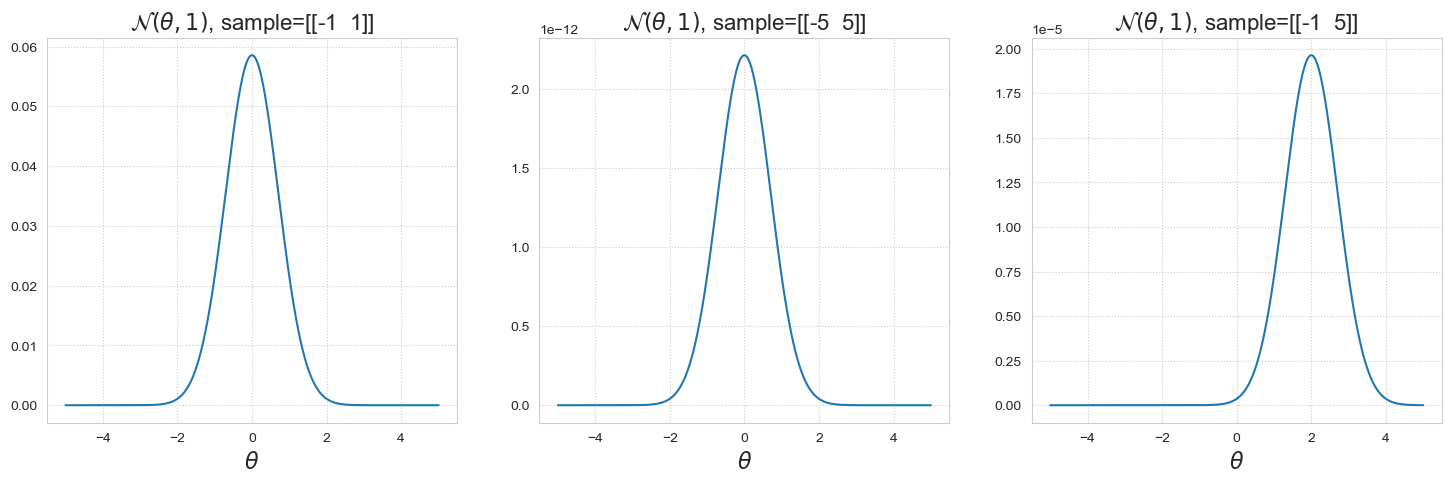

In [51]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

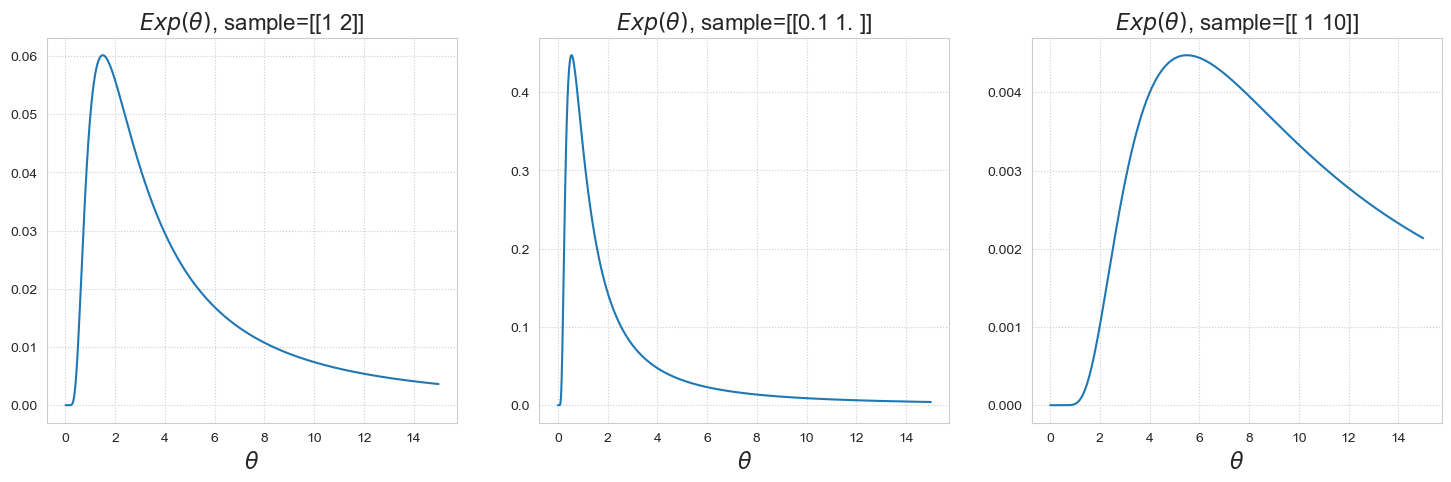

In [67]:
grid = np.linspace(10**(-3), 15, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=grid).pdf, grid,
                [ [1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

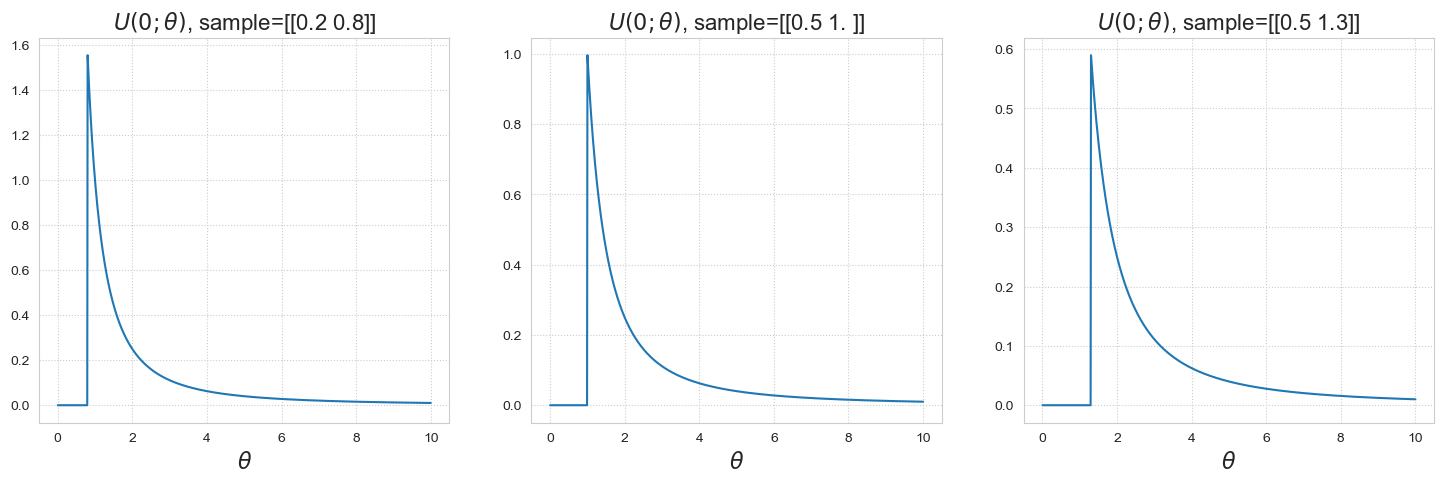

In [68]:
grid = np.linspace(10**(-3), 10, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(0, grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U(0; \\theta)$')

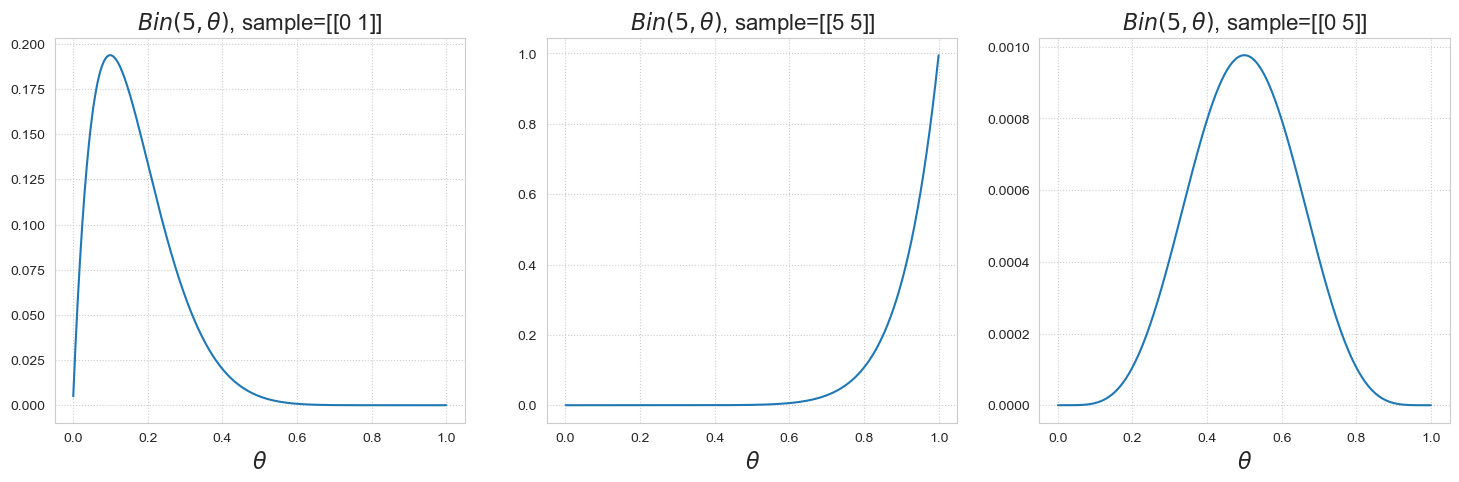

In [83]:
grid = np.linspace(10**(-3), 2, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(5, p=grid).pmf, grid,
                [[0, 1], [5, 5], [0, 5]], r'$Bin(5,\theta)$')

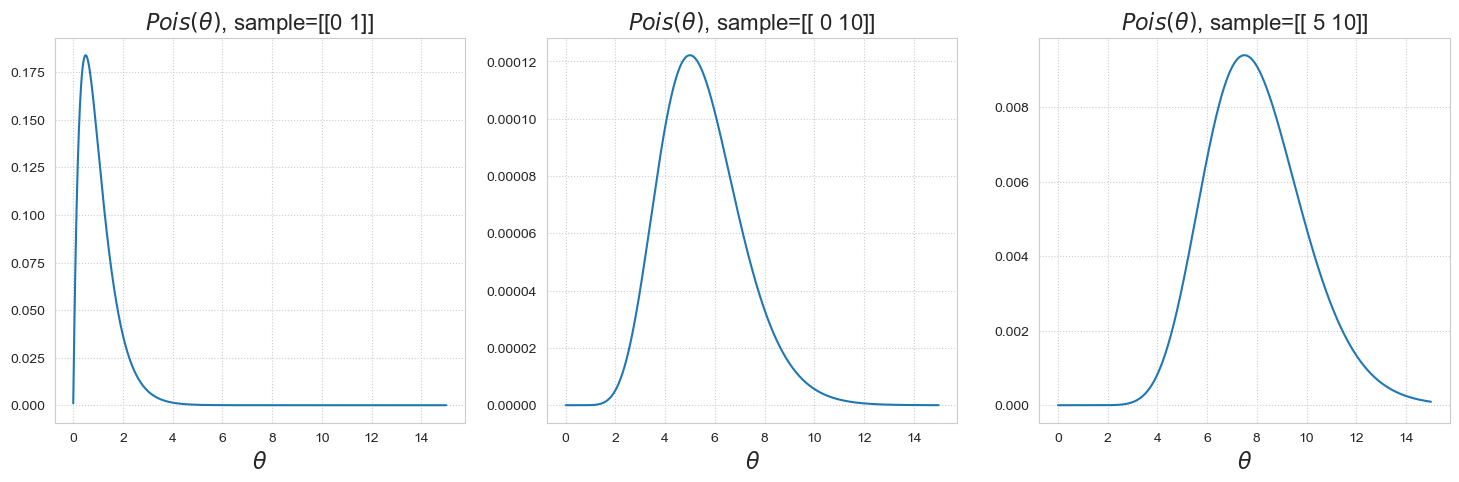

In [72]:
grid = np.linspace(10**(-3), 15, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(grid).pmf, grid,
                [[0, 1], [0, 10], [5, 10]], r'$Pois(\theta)$')

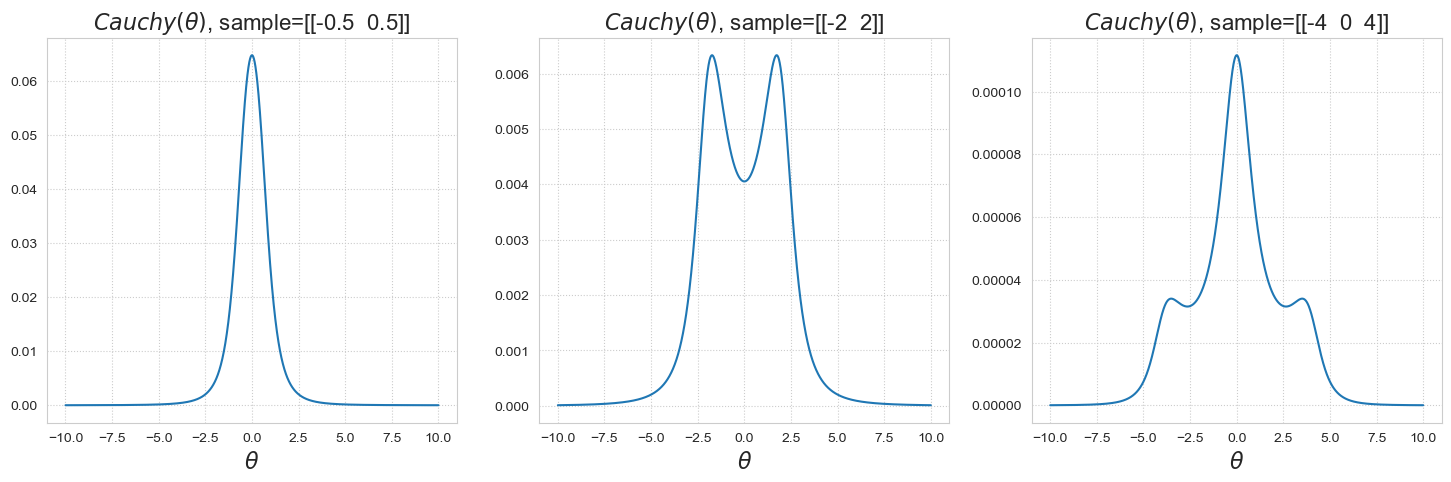

In [73]:
grid = np.linspace(-10, 10, 3000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], r'$Сauchy(\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

**Normal**

Видно, что для симметричных выборок (1 и 2) максимум функции правдоподобия достигается в выборочном среднем, то есть в нуле. Для теретьей выборки ([-1;5]) аналогично максимум функции правдоподобия совпадает с выборочным средним, и в этом случае он находится в точке 2. Сами же значения максимумов зависят от диапазона значений (ширины выборки), поскольку в плотности нормального распределении стоит функция вида $e^{-x^2}$, которая быстро убывает, то при большем диапазоне значений макисмум окажется значительно ниже (на 1 и 2 графиках отличие на $\approx$ 10 порядков)

**Expon**

Можно заметить, что полученные графики функций правдоподобия сильно напоминают KDE для выборки из экспоненциального распределения, которые мы строили в начале курса. Исходя из формулы для экспоненциального распределения: $p_{\theta}(x)=\theta e^{-\theta x}$ и вида функции правдоподобия видно, что для выборки $[x_1, x_2]$:
$$
\mathcal{L}=\theta^2 exp(-\theta(x_1+x_2))\Rightarrow\ \theta = \frac{x_1+x_2}{2}
$$
То есть положение максимума совпадает с выборочным средним. А отношение величины максимума к интегралу $\int\limits_{-\infty}^{+\infty}\mathcal{L}d\theta$, то есть обобщённая ширина графика определяется шириной выборки

**Uniform**

В случае когда $\theta$ меньше, чем большее из чисел [a;b], то $\mathcal{L} = 0$, поскольку хотя бы одна из вероятностей зануляется, а следовательно и вся функция правдоподобия. В ином случае функция правдоподобия имеет вид:
$$\mathcal{L}_{\theta}(x)=\frac{1}{(b-a)^n}\ $$
То есть убывает как $ \frac{1}{\theta^2}$ с макисмумом в $\theta=b$

**Binom**

Из графиков видно, что чем ближе значение $x_1, x_2$ к 5, тем ближе значение макимума функции правдоподобия на графике к единице. На 3 графике для выборки в диапазоне $x\in [0;5]$ наиболее вероятное значение параметра $\theta$ оказывается 0,5 что логично. Рассмотрим 2 случай (10 точек):
$$
    \mathcal{L}(\theta)=C\theta^{k_1+k_2}(1-\theta)^{10-(k_1+k_2)}\Rightarrow \frac{\partial \mathcal{L}}{\partial \theta}\ =\ 0 = (k_1+k_2)\theta^{k_1+k_2-1}-(10-k_1-k_2)(1-\theta)^{11-k_1-k_2}
$$
откуда следуют описанные выше свойства 

**Poisson**
Напишем функцию правдоподобия для $[k_1; k_2]$:
$$
\mathcal{L}(\theta) = \frac{\theta^{k_1+k_2}}{k_1!k_2!}\exp{(-2\theta)}\Rightarrow 
\frac{\partial \mathcal{L}}{\partial \theta}\ = k_1+k_2 - 2\theta =\ 0\ \Rightarrow \theta = \frac{k_1+k_2}2 
$$
Таким образом мы получили результат, аналогичный с экспоненциальным распределением, положение максимума функции правдоподобия -- выборочное среднее. А максимум, судя по выражению для $\mathcal{L}$  и графикам падает с ростом разницы в значениях $k_1, k_2$

**Cauchy**

У распределения Коши, как мы знаем из курса Теории вероятностей, очень тяжёлые хвосты, то есть значение плотности затухает значительно медленнее, чем у нормального. Это свойство объясняет наличие у графиков функции правдоподобия нескольких максимумов.
$p_{\theta}=\frac{1}{\pi(1+\theta^2)}$ При дифференцировании функции правдоподобия для двух точек мы получим уравнение вида:
$$
\frac{\partial \mathcal{L}}{\partial \theta}\ =\ P_3(\theta)\ =\ 0
$$ - полином 3 стпепени по $\theta\ \Rightarrow$ три стационарные точки и три экстремума.
Аналогично для 3 точек мы получим уже 5 экстремумов и 3 минимума, что видно на 3м графике

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [75]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый [метод класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), реализующий это распределение.

**Ответ на вопрос и описание метода решения проблемы:**


**Ответ:** При вычислении функции правдоподобия обычным способом мы перемножаем много значений, каждое из котороых < 1. При небольших размерах выборок полученное значение вычисляется недолго и довлоьно точно. Однако при больших, как в примере выше, размерах выборки наше значение оказывается очень близко к нули, а значит растёт погрешность вычислений и в какой-то момент наши значения начинают умножаться на тождественный ноль. 

Для избежания этой проблемы посчитаем логорифм функции правдоподобия. При логорифмировании произведение переходит в сумму и мы можем воспользоваться встроенной функцией класса `norm`: `.logpdf`

In [78]:
likelihood_corr=np.sum(sps.norm.logpdf(sample))
likelihood_corr

-141964.59168971362

Тогда полученное значение функции правдоподобия $\mathcal{L}\ \approx\ e^{-14*10^3}\ \approx\ 1.04\cdot10^{-6167}$, что крайне мало

### <b><font color="orange">Сложная часть</font></b>


## Задача 6
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример подсчета:*

Допустим, вы хотите оценить реальный уровень доверия интервала для $a$, если $X \sim \mathcal{N}(a, \sigma^2)$

- Фиксируете истинные $(a, \sigma^2)$, для которых будете делать оценку
- Генерируете $B$ выборок из $\mathcal{N}(a, \sigma^2)$ с зафиксированными параметрами
- По каждой выборке получаете АДИ для $a$ 
- Считаете долю случаев, когда истинное $a$ попадает в интервал

Эта доля и будет оценкой доли покрытия интервала.

**Важно:** вы симулируете реальную ситуацию, когда вы не знаете ни $a$, ни $\sigma$, поэтому в формулах для АДИ их **использовать нельзя**!

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка. 

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)? 

**Ваш ответ:**
$10^4$

### Генерация выборок для оценки

Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [84]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = 1000
X = sps.norm.rvs(size=(sample_count, sample_size))
X.shape

(1000, 300)

### Случай АДИ

На лекции вы получали формулу для асимптотического доверительного интервала для $a$

Асимптотический доверительный интервал: $\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n}}z_{(1+\alpha)/2}, \overline{X} + \frac{S}{\sqrt{n}}z_{(1+\alpha)/2} \bigg)$

Посчитайте $z$ (используйте функцию `.ppf`)

In [121]:
z_90=sps.norm(loc=theta).ppf(0.95)

Постройте график зависимости реального уровня доверия интервала от размера выборки. График начинайте с $n=2$.

Для этого вам нужно провести описанную выше процедуру для подвыборок разных размеров. Для подсчета интервалов по префиксам используйте функцию `np.cumsum`. Для того чтобы не запутаться, разносите подсчет разных величин, входящих в формулу, по разным строчкам. 

In [122]:
X_means=np.cumsum(X, axis=1)[:, 1:]/np.arange(301)[2:]
X_s=np.sqrt(np.cumsum((X[:, 1:]-X_means)**2, axis=1)/np.arange(301)[2:])

Теперь рассчитаем границы АДИ:

In [123]:
left = X_means-X_s*z_90/np.sqrt(np.arange(301)[2:]) # Левая граница
right = X_means+X_s*z_90/np.sqrt(np.arange(301)[2:]) # Правая граница

Частота попаданий в интервал

In [124]:
counts = ((theta>=left) & (theta <= right)).sum(axis=0)/sample_count

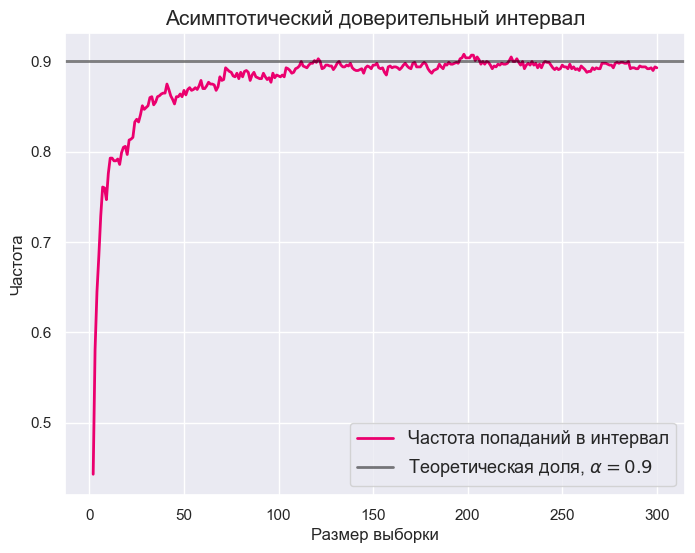

In [127]:
sns.set_theme()
plt.figure(figsize=(8,6))
plt.title('Асимптотический доверительный интервал', fontsize=15)
plt.plot(np.arange(301)[2:], counts, label='Частота попаданий в интервал', color='#EB006E', lw=2)
plt.axhline(0.9, label=r'Теоретическая доля, $\alpha=0.9$', color='black', lw=2, alpha=0.5)
plt.legend(fontsize=13)
plt.xlabel('Размер выборки')
plt.ylabel('Частота')
plt.show()

Сделайте выводы.

По полученному графику видно, что при достаточно больших размерах выборки асимптотический доверительный интервал (АДИ) практически совпадает с точным. Поэтому им ожно хорошо оценивать интервал, куда истинное значение параметра попадает с заданной наперёд точностью $\alpha$ при достаточно больших размерах. По графику видно, что Для точности > 85% достаточно размера $n>50$

### Случай ТДИ

На лекции вы получали формулу для точного доверительного интервала для $a$ в нормальной модели

Точный доверительный интервал: $\theta \in \bigg(\overline{X} - \frac{S}{\sqrt{n-1}}T_{n-1,(1+\alpha)/2}, \overline{X} + \frac{S}{\sqrt{n-1}}T_{n-1,(1+\alpha)/2} \bigg)$

**Вопрос:** чем этот интервал лучше предыдущего?

**Ваш ответ:** Данный интервал не просто так называют точным, за счёт распределения Стьюдента он должен приближать истинное значение уровня доверия со значительно более слабой зависимостью от размера выборки.

Постройте график реального уровня доверия интервала от размера выборки для этого вида интервала. График начинайте с $n=2$. Сравните его с предыдущим. 

Квантили распределения Стьюдента

In [128]:
T_s=sps.t(loc=theta, df=np.arange(300)).ppf(0.95)[1:]

Границы интервалов и частота попаданий в истинный интервал

In [131]:
left = X_means - X_s*T_s/np.sqrt(np.arange(1,300)) #Левые границы
right = X_means + X_s*T_s/np.sqrt(np.arange(1,300)) #Правые границы

counts_t = ((theta>=left) & (theta <= right)).sum(axis=0)/sample_count #Частота попаданий

Построим график:

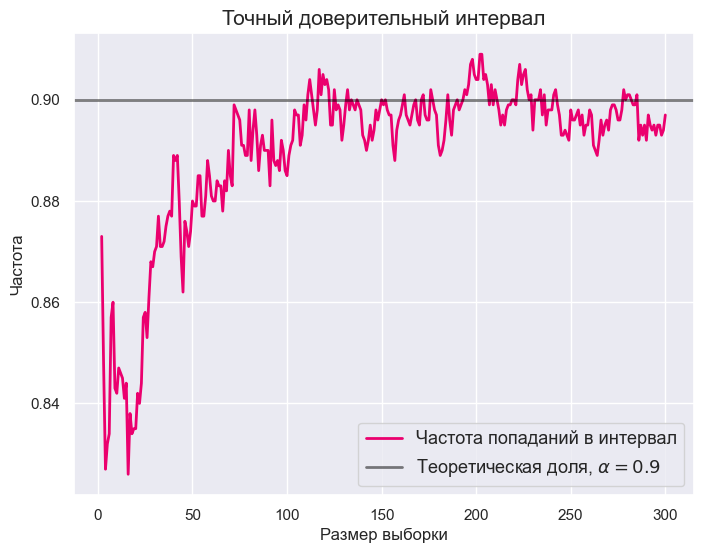

In [133]:
sns.set_theme()
plt.figure(figsize=(8,6))
plt.title('Точный доверительный интервал', fontsize=15)
plt.plot(np.arange(301)[2:], counts_t, label='Частота попаданий в интервал', color='#EB006E', lw=2)
plt.axhline(0.9, label=r'Теоретическая доля, $\alpha=0.9$', color='black', lw=2, alpha=0.5)
plt.legend(fontsize=13)
plt.xlabel('Размер выборки')
plt.ylabel('Частота')
plt.show()

Теперь можем сравнить результаты, построив их на одном графике:

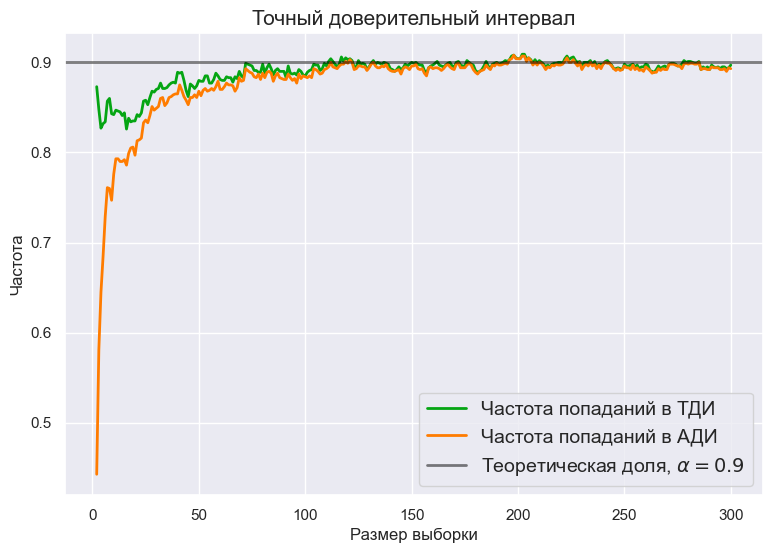

In [137]:
sns.set_theme()
plt.figure(figsize=(9,6))
plt.title('Точный доверительный интервал', fontsize=15)
plt.plot(np.arange(301)[2:], counts_t, label='Частота попаданий в ТДИ', color='#05A513', lw=2)
plt.plot(np.arange(301)[2:], counts, label='Частота попаданий в АДИ', color='#FF7C00', lw=2)
plt.axhline(0.9, label=r'Теоретическая доля, $\alpha=0.9$', color='black', lw=2, alpha=0.5)
plt.legend(fontsize=14)
plt.xlabel('Размер выборки')
plt.ylabel('Частота')
plt.show()

**Вывод:** Точный доверительный интервал, как и ожидалось, показыват хорошие результаты на любых размерах выборки, хотя флкутуации частоты попаданий с ростом размера выборки $n$ всё равно падают. При этом при любых $n$ доля покрытия истинного значения $\theta$ интервалом составила не менее 82%, что является очень хорошим результатом и позволяет использовать ТДИ для оценкок также при любых размерах выборок